In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
a, b = 5., 3. 
n = 65
mr = np.empty((n, n))

for x in range(n):
    for y in range(n):
        cx = -4 + (x / n) * 8
        cy = -4 + (y / n) * 8
        d = max(abs(cx) - a/2, abs(cy) - b/2)
        mr[y, x] = d
        

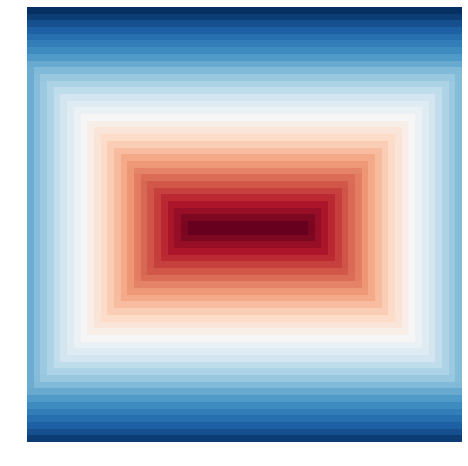

In [37]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(mr, cmap='RdBu')

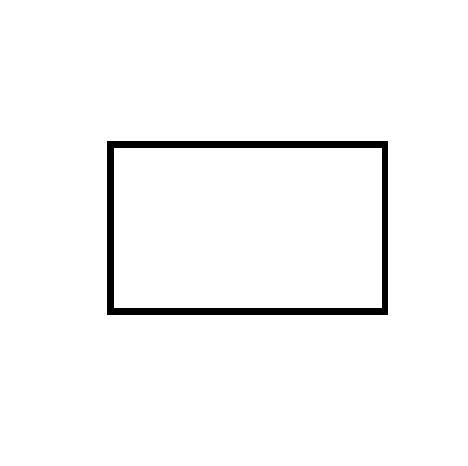

In [38]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(abs(mr)<.07, cmap='Greys')

In [39]:
import math 

radius = 2.2

mc = np.empty((n, n))

for x in range(n):
    for y in range(n):
        cx = -4 + (x / n) * 8
        cy = -4 + (y / n) * 8
        d = math.sqrt(cx**2 + cy**2) - radius
        mc[y, x] = d

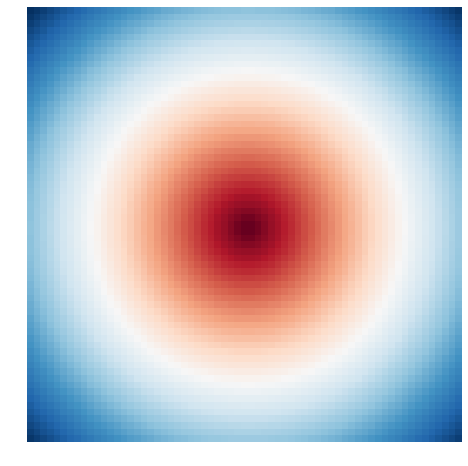

In [40]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(mc, cmap='RdBu')

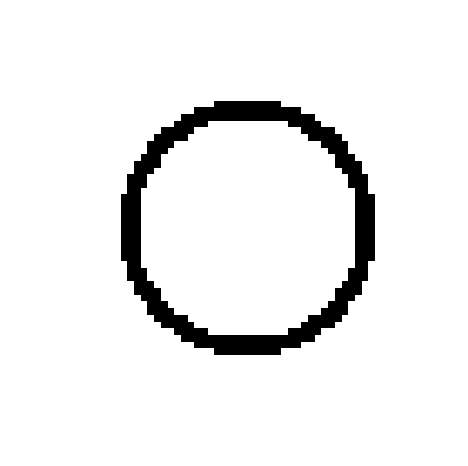

In [41]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(abs(mc)<.17, cmap='Greys')

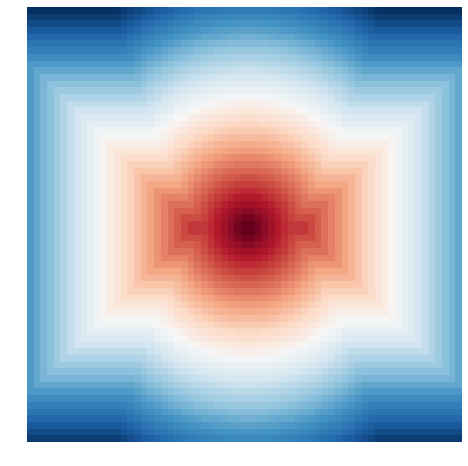

In [42]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(np.minimum(mr, mc), cmap='RdBu')

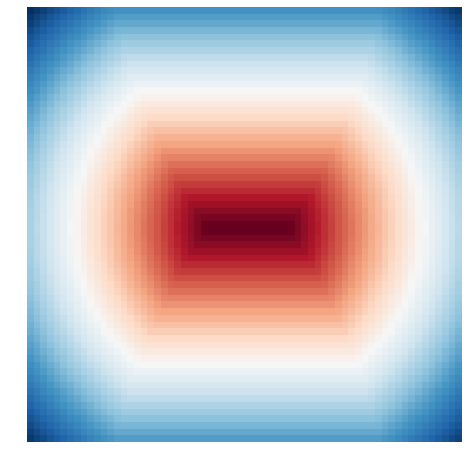

In [43]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(np.maximum(mr, mc), cmap='RdBu')

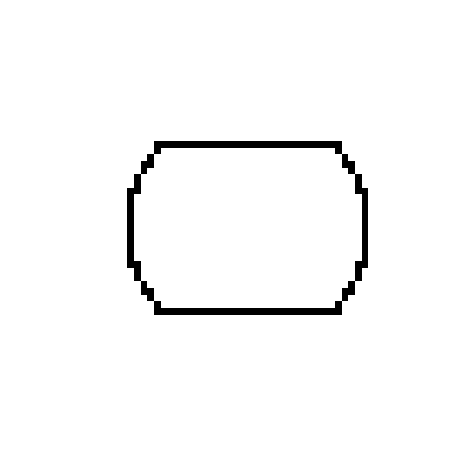

In [44]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(abs(np.maximum(mr, mc))<.07, cmap='Greys')

In [46]:
from skimage import measure

In [64]:
union = np.minimum(mr, mc)
dmap = abs(union) - 0.2

In [65]:
dmap.shape

(65, 65)

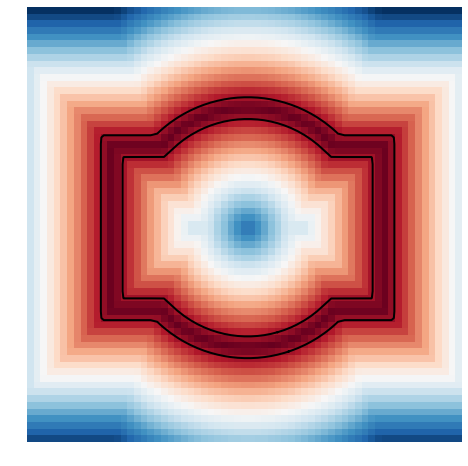

In [66]:
contours = measure.find_contours(dmap, 0.)
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(dmap, cmap='RdBu')
for i, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='k')

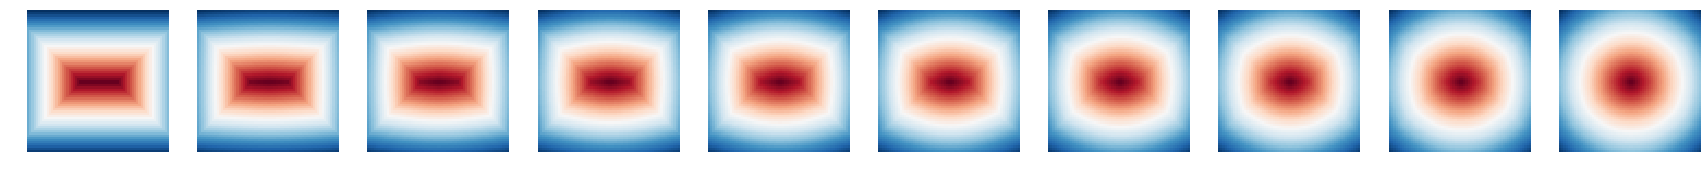

In [68]:
plt.figure(figsize=(30,3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    f = i / 10.
    plt.axis('off')
    morph = (1-f) * mr + f * mc
    plt.imshow(morph, cmap='RdBu')